In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [2]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [3]:
np.random.seed(5)

In [4]:
DATASET = "cebollas.csv"
CROP = "CEBOLLA CABEZA BLANCA NACIONAL"

In [5]:
data = pd.read_csv('../Data/'+DATASET, engine='python')
data = data[data.producto == CROP]["precio_mean"]
data

0      0.935161
1      1.120645
2      1.411071
3      1.810968
4      2.003667
         ...   
96     0.900968
97     0.946774
98     1.044444
99     1.469032
100    1.814667
Name: precio_mean, Length: 101, dtype: float64

In [6]:
dataset = data.values
dataset = dataset.astype('float32')
dataset

array([0.9351613 , 1.1206452 , 1.4110714 , 1.8109677 , 2.0036666 ,
       2.8248386 , 2.3646667 , 2.405     , 1.4606452 , 1.4606667 ,
       1.0964516 , 0.7416667 , 0.58064514, 0.5825806 , 0.6667857 ,
       0.7664516 , 1.6803334 , 2.042258  , 1.9103333 , 2.0896773 ,
       1.8306452 , 1.6853334 , 1.2183871 , 0.998     , 0.91774195,
       0.88387096, 0.9541379 , 1.1119355 , 1.6593333 , 2.0467741 ,
       2.14      , 1.3222581 , 1.2245162 , 1.0973333 , 1.0283871 ,
       0.984     , 0.7529032 , 0.7219355 , 0.9103571 , 1.78      ,
       1.9756666 , 1.6790322 , 1.4113333 , 1.38      , 1.2712903 ,
       1.0126667 , 0.9232258 , 0.8746667 , 0.9303226 , 0.9706452 ,
       0.7664286 , 0.8316129 , 0.96566665, 1.1067742 , 1.354     ,
       1.3841935 , 1.4029032 , 1.385     , 1.2903225 , 1.2843333 ,
       1.0380645 , 0.90967745, 0.9096429 , 1.2364516 , 2.3496666 ,
       2.3945162 , 2.207     , 1.7380645 , 1.5403225 , 1.2046666 ,
       0.8845161 , 0.712     , 0.5793548 , 0.55096775, 0.58206

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))
dataset

array([[0.16896012],
       [0.25053197],
       [0.37825528],
       [0.55412114],
       [0.63886595],
       [1.        ],
       [0.79762614],
       [0.8153639 ],
       [0.40005675],
       [0.40006617],
       [0.23989218],
       [0.08386531],
       [0.01305148],
       [0.01390266],
       [0.05093426],
       [0.09476519],
       [0.49667093],
       [0.65583766],
       [0.5978199 ],
       [0.67669165],
       [0.5627749 ],
       [0.4988698 ],
       [0.29351678],
       [0.19659525],
       [0.16129947],
       [0.14640373],
       [0.17730564],
       [0.24670166],
       [0.48743555],
       [0.6578238 ],
       [0.6988225 ],
       [0.33919707],
       [0.29621223],
       [0.24027991],
       [0.20995882],
       [0.19043836],
       [0.0888069 ],
       [0.07518798],
       [0.15805179],
       [0.5405022 ],
       [0.6265522 ],
       [0.49609873],
       [0.37837043],
       [0.36459073],
       [0.3167825 ],
       [0.20304534],
       [0.16371116],
       [0.142

In [8]:
train = dataset[0:int(dataset.shape[0]*0.8),:]
test = dataset[int(dataset.shape[0]*0.8):len(dataset),:]

In [9]:
time_steps = 3
n_features = 1
n_epochs = 100

In [10]:
trainX, trainY = create_dataset(train, time_steps)
testX, testY = create_dataset(test, time_steps)

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2022-06-25 18:44:59.597681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
76/76 - 1s - loss: 0.1316 - 1s/epoch - 18ms/step
Epoch 2/100
76/76 - 0s - loss: 0.0621 - 94ms/epoch - 1ms/step
Epoch 3/100
76/76 - 0s - loss: 0.0480 - 124ms/epoch - 2ms/step
Epoch 4/100
76/76 - 0s - loss: 0.0448 - 115ms/epoch - 2ms/step
Epoch 5/100
76/76 - 0s - loss: 0.0434 - 113ms/epoch - 1ms/step
Epoch 6/100
76/76 - 0s - loss: 0.0426 - 116ms/epoch - 2ms/step
Epoch 7/100
76/76 - 0s - loss: 0.0413 - 116ms/epoch - 2ms/step
Epoch 8/100
76/76 - 0s - loss: 0.0419 - 115ms/epoch - 2ms/step
Epoch 9/100
76/76 - 0s - loss: 0.0395 - 107ms/epoch - 1ms/step
Epoch 10/100
76/76 - 0s - loss: 0.0391 - 113ms/epoch - 1ms/step
Epoch 11/100
76/76 - 0s - loss: 0.0384 - 105ms/epoch - 1ms/step
Epoch 12/100
76/76 - 0s - loss: 0.0377 - 91ms/epoch - 1ms/step
Epoch 13/100
76/76 - 0s - loss: 0.0371 - 103ms/epoch - 1ms/step
Epoch 14/100
76/76 - 0s - loss: 0.0367 - 86ms/epoch - 1ms/step
Epoch 15/100
76/76 - 0s - loss: 0.0361 - 98ms/epoch - 1ms/step
Epoch 16/100
76/76 - 0s - loss: 0.0360 - 88ms/epoch - 1

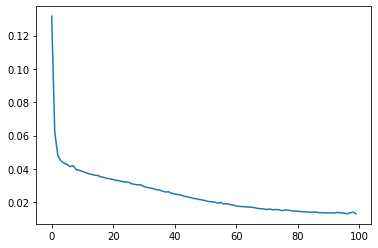

In [13]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 14ms/step


In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [16]:
# calculate root mean squared error
trainScore = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.15 MAPE
Test Score: 0.08 MAPE


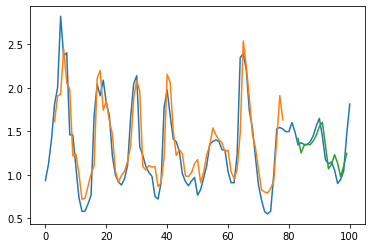

In [17]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()